In [1]:
import pandas as pd
df_train = pd.read_csv("C://Users//27adi//Downloads//train.txt",sep=';',names=['text','label'])
df_val = pd.read_csv("C://Users//27adi//Downloads//val.txt",sep=';',names=['text','label'])

C:\Users\27adi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\27adi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.concat([df_train, df_val])
df.reset_index(inplace=True,drop=True)

In [3]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df.shape

(18000, 2)

In [5]:
df['label'].value_counts()

label
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64

In [6]:
 df.replace(to_replace ="surprise", value =1, inplace=True)
df.replace(to_replace ="love", value =1, inplace=True)
df.replace(to_replace ="joy", value =1, inplace=True)
df.replace(to_replace ="fear", value =0, inplace=True)
df.replace(to_replace ="anger", value =0, inplace=True)
df.replace(to_replace ="sadness", value =0, inplace=True)

C:\Users\27adi\AppData\Local\Temp\ipykernel_24788\795497977.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace ="sadness", value =0, inplace=True)


In [7]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [8]:
df['text']=df['text'].str.lower()

In [9]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [10]:
import re
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
df['tokenized_text'] = df['text'].apply(word_tokenize)

In [13]:
df.head()

,text,label,tokenized_text
0,i didnt feel humiliated,0,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,0,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,1,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,0,"[i, am, feeling, grouchy]"


In [14]:
from nltk.corpus import stopwords

In [15]:
# Get stopwords
stopWords = set(stopwords.words('english'))

# Loop through each row in the 'tokenized_text' column
for i in range(len(df)):  # Iterate through the indices of the DataFrame
    word_list = df['tokenized_text'][i]  # Get the list of words for each row
    
    # Create an empty list to hold the non-stopword words
    cleaned_words = []
    
    # Loop through each word in the word_list
    for word in word_list:
        if word not in stopWords:  # Only add words that are not stopwords
            cleaned_words.append(word)
    
    # Update the DataFrame with the cleaned list
    df.at[i, 'tokenized_text'] = cleaned_words
    

#stopWords = set(stopwords.words('english'))
#for word in df['tokenized_text']:
    #for w in word:
        #if w in stopWords:
            #word.remove(w)

In [16]:
df.head()

,text,label,tokenized_text
0,i didnt feel humiliated,0,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,0,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,1,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,0,"[feeling, grouchy]"


In [17]:
import spacy

In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
for i in range(len(df)):
    # Process tokenized text with spaCy
    doc = nlp(" ".join(df['tokenized_text'][i]))
    
    # Extract lemmatized tokens and update DataFrame
    df.at[i, 'tokenized_text'] = [token.lemma_ for token in doc]

In [20]:
df.head()

,text,label,tokenized_text
0,i didnt feel humiliated,0,"[do, not, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,0,"[go, feel, hopeless, damned, hopeful, around, ..."
2,im grabbing a minute to post i feel greedy wrong,0,"[I, m, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,1,"[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,0,"[feel, grouchy]"


In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
for i in range(len(df)):  # Iterate through the indices of the DataFrame
    word_list = df['tokenized_text'][i]  # Get the list of words for each row
    stemmed_words = []
    for word in word_list:
        stemmed_words.append(stemmer.stem(word))
    df.at[i, 'tokenized_text'] = stemmed_words

In [22]:
df.head()

,text,label,tokenized_text
0,i didnt feel humiliated,0,"[do, not, feel, humili]"
1,i can go from feeling so hopeless to so damned...,0,"[go, feel, hopeless, damn, hope, around, someo..."
2,im grabbing a minute to post i feel greedy wrong,0,"[i, m, grab, minut, post, feel, greedi, wrong]"
3,i am ever feeling nostalgic about the fireplac...,1,"[ever, feel, nostalg, fireplac, know, still, p..."
4,i am feeling grouchy,0,"[feel, grouchi]"


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))
df['processed_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))
X = vectorizer.fit_transform(df['processed_text'])
print(vectorizer.get_feature_names_out())

['aa' 'aaaaaaand' 'aaaaand' ... 'zum' 'zumba' 'zz']


In [24]:
y = df.label

In [25]:
print(vectorizer.vocabulary_)

{'do': 2673, 'not': 6499, 'feel': 3386, 'humili': 4503, 'go': 3930, 'hopeless': 4440, 'damn': 2226, 'hope': 4438, 'around': 491, 'someon': 8766, 'care': 1372, 'awak': 638, 'grab': 3976, 'minut': 6020, 'post': 7266, 'greedi': 4020, 'wrong': 10691, 'ever': 3173, 'nostalg': 6496, 'fireplac': 3473, 'know': 5239, 'still': 9032, 'properti': 7432, 'grouchi': 4050, 've': 10227, 'littl': 5517, 'burden': 1249, 'late': 5320, 'be': 783, 'sure': 9232, 'take': 9339, 'milligram': 5992, 'time': 9595, 'recommend': 7700, 'amount': 321, 'fall': 3314, 'asleep': 532, 'lot': 5590, 'fast': 3345, 'also': 281, 'like': 5473, 'funni': 3749, 'confus': 1897, 'life': 5457, 'teenag': 9417, 'jade': 4945, 'year': 10738, 'old': 6620, 'man': 5732, 'petrona': 7049, 'perform': 7002, 'well': 10481, 'make': 5711, 'huge': 4489, 'profit': 7410, 'romant': 8006, 'suffer': 9172, 'see': 8292, 'mean': 5860, 'someth': 8768, 'run': 8070, 'divin': 2660, 'experi': 3245, 'expect': 3241, 'type': 9890, 'spiritu': 8879, 'encount': 3027, '

In [26]:
df.head()

,text,label,tokenized_text,processed_text
0,i didnt feel humiliated,0,"[do, not, feel, humili]",do not feel humili
1,i can go from feeling so hopeless to so damned...,0,"[go, feel, hopeless, damn, hope, around, someo...",go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,"[i, m, grab, minut, post, feel, greedi, wrong]",i m grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,1,"[ever, feel, nostalg, fireplac, know, still, p...",ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,"[feel, grouchi]",feel grouchi


In [27]:
corpus = df['processed_text'].tolist()

In [28]:
print(corpus)

['do not feel humili', 'go feel hopeless damn hope around someon care awak', 'i m grab minut post feel greedi wrong', 'ever feel nostalg fireplac know still properti', 'feel grouchi', 'i ve feel littl burden late be not sure', 'i ve take milligram time recommend amount i ve fall asleep lot fast also feel like funni', 'feel confus life teenag jade year old man', 'petrona year feel petrona perform well make huge profit', 'feel romant', 'feel like make suffer see mean someth', 'feel run divin experi expect type spiritu encount', 'think easi time year feel dissatisfi', 'feel low energi thirsti', 'immens sympathi gener point possibl proto writer tri find time write corner life sign agent let alon publish contract feel littl preciou', 'feel reassur anxieti side', 'do not realli feel embarrass', 'feel pretti pathet time', 'start feel sentiment doll child begin collect vintag barbi doll sixti', 'feel compromis skeptic valu everi unit work put', 'feel irrit reject without anyon anyth say anyth'

In [29]:
!pip install wordcloud

In [30]:
import matplotlib.pyplot as plt

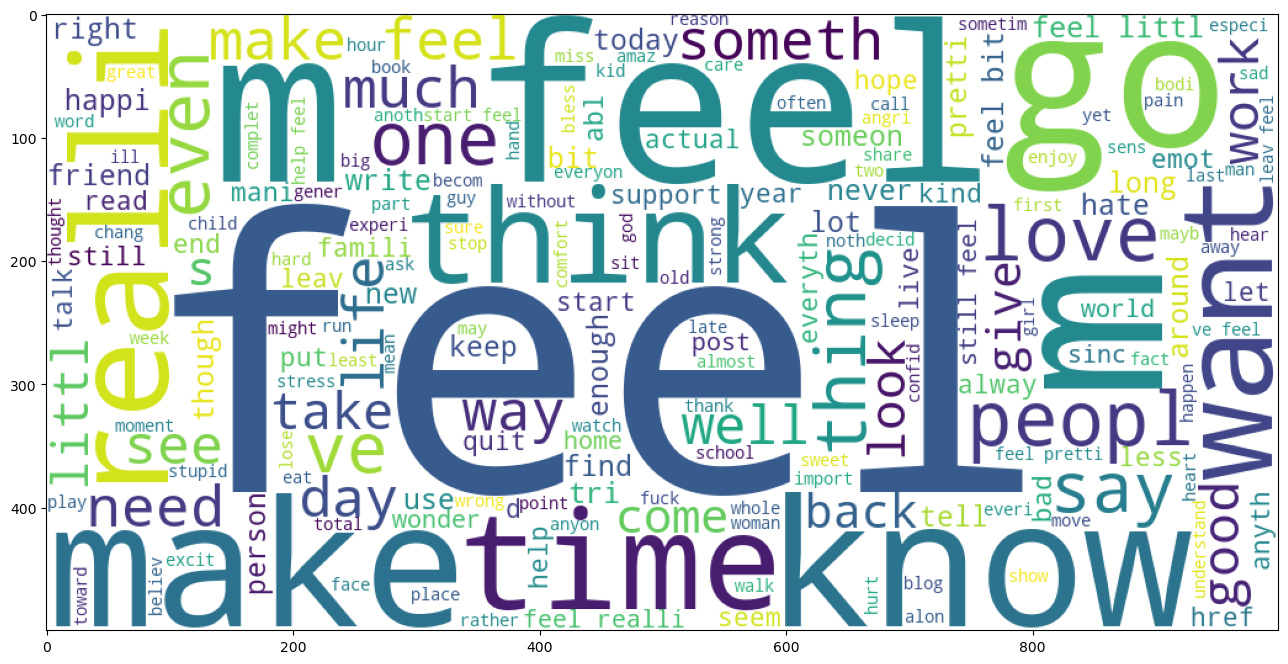

In [31]:
from matplotlib import rcParams
from wordcloud import WordCloud
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,2))
traindata = vectorizer.fit_transform(corpus)

In [33]:
print('Ngram representation for "{}" is {}'
      .format(corpus[0], traindata[0].toarray())) 

Ngram representation for "do not feel humili" is [[0 0 0 ... 0 0 0]]


In [34]:
X = traindata
y = df.label

In [35]:
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64


In [37]:
print(X[0])

  (0, 22787)	1
  (0, 62608)	1
  (0, 29891)	1
  (0, 43523)	1
  (0, 22828)	1
  (0, 62743)	1
  (0, 30656)	1


In [38]:
print(y[0])

0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred)

In [43]:
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 94.94444444444444


In [45]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1950
           1       0.94      0.94      0.94      1650

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600



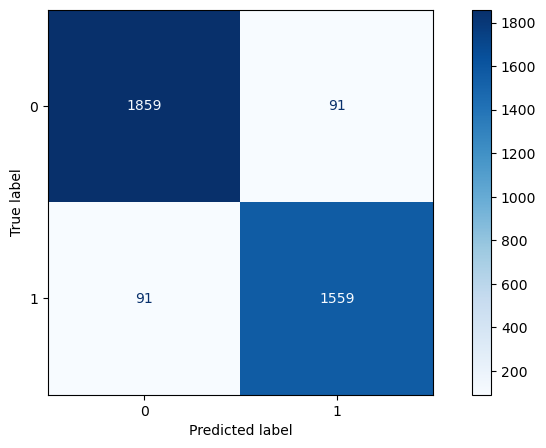

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

In [51]:
# Function to preprocess text
def preprocess_text_spacy(input_text):
    # Clean the input text
    text = re.sub(r'[^a-zA-Z]', ' ', input_text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatize and remove stopwords
    processed_words = [token.lemma_ for token in doc if not token.is_stop]
    
    return ' '.join(processed_words)

# Example input
input1 = ["Sometimes I just want to punch someone in the face."]

# Preprocess text using spaCy
preprocessed_text = [preprocess_text_spacy(sentence) for sentence in input1]
print("Preprocessed Text:", preprocessed_text)

# Fit and transform the preprocessed text
vectorized_text = vectorizer.fit_transform(preprocessed_text)
prediction = lr.predict(vectorized_text)

Preprocessed Text: ['want punch face']


ValueError: X has 5 features, but LogisticRegression is expecting 106015 features as input.